This notebook loads the _Randoms_ data set, uses Pandas to group the records into quantiles and then uses _Matplotlib_ to generate complex charts.

In [1]:
from Randoms_2 import load_randoms
import matplotlib.pyplot as plt
import pandas

Load data set in _randoms_map_. The map associates each random value (key) with the list of zero-based iterations (value) where the value was generated. Next, create a _randoms_dataFrame_ which is basically a table where each row has two columns:
- _quantile_: a number 0 .. 9, standing for one of the ten sub-intervals of the iterations range.
- _value_: the random value that was generated at an iteration within the associated quantile.

Think of _randoms_dataFrame_ as a database table. Pandas allow us to do SQL-like operations on this table.

In [2]:
randoms_map, count = load_randoms("randoms_db.txt")
print(f"Loaded {len(randoms_map.keys())} unique random generated in a sequence of {count} iterations")
rows = []
for random_value, indexes in randoms_map.items():
    for index in indexes:
        quantile = int(index / 10)
        rows.append({"quantile": quantile, "value": random_value})
randoms_dataFrame = pandas.DataFrame(rows)

Loaded 47 unique random generated in a sequence of 100 iterations


Group all rows of <i>randoms_dataFrame</i> by the _quantile_ column. Then create two aggregates:
- _quantile_stats_ aggregate all values in each group to generate _min_, _max_, _median_, _mean_ and _std values for the group.
- _quantile_values_ aggregates in a list all the values in a quantile.

In [3]:
quantile_groups = randoms_dataFrame.groupby("quantile")
quantile_stats = quantile_groups["value"].agg(["min", "max", "median", "mean", "std"]).reset_index()
quantile_values = quantile_groups["value"].apply(list)

Create a composed chart using the _quantile_stats_ DataFrameGroup, showing two things for each _quantile_ value:
- a plot chart showing the random values _mean_ within the _quantile_
- a bar chart showing the random values _standard_deviation_ within the _quantile.

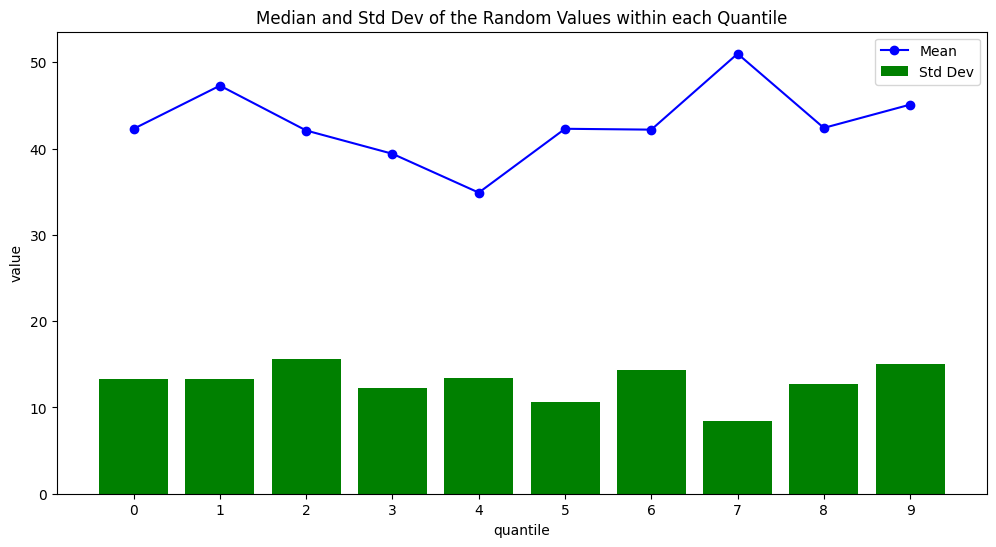

In [4]:
plt.figure(figsize=(12, 6))
plt.title("Median and Std Dev of the Random Values within each Quantile")
plt.xlabel("quantile")
plt.ylabel("value")
plt.xticks(range(len(quantile_stats)), quantile_stats["quantile"])
plt.plot(quantile_stats["quantile"], quantile_stats["mean"], label="Mean", color="blue", marker="o")
plt.bar(quantile_stats["quantile"], quantile_stats["std"], label="Std Dev", color="green")
plt.legend()
plt.show()

Create a composed chart from both _quantile_values_ and _quantile_stats_ groups, showing a few charts:
- three plot charts showing the _max_, _median_ and _min_ values of all the randoms within that _quantile_.
- one boxplot (whiskers) chart showing the dimensions of the four quartiles within the quantile.


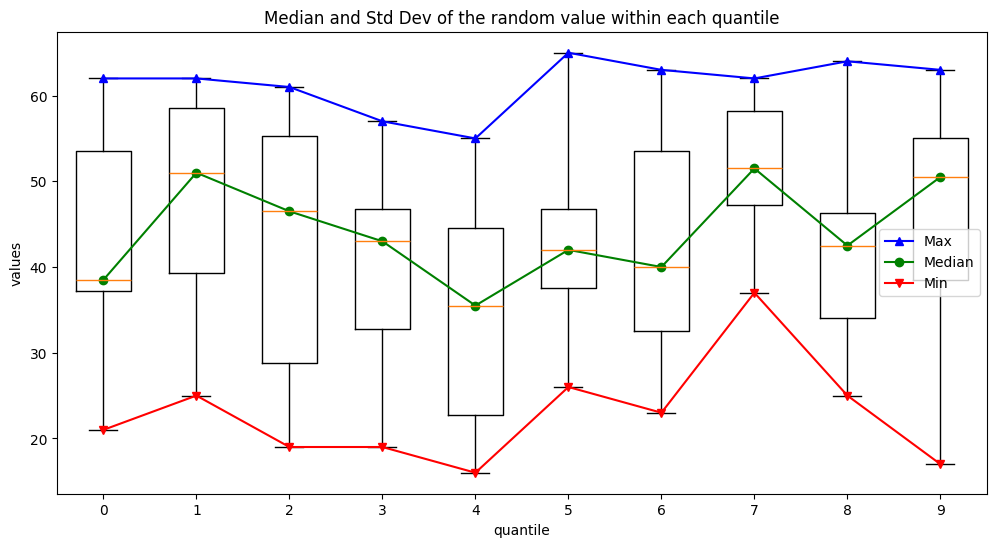

In [5]:
plt.figure(figsize=(12, 6))
plt.title("Median and Std Dev of the random value within each quantile")
plt.xlabel("quantile")
plt.ylabel("values")
plt.boxplot(quantile_values.tolist(), positions=range(len(quantile_values)), widths=0.6, whis=[0, 100])
plt.xticks(range(len(quantile_values)), quantile_values.index.tolist())
plt.plot(quantile_stats["quantile"], quantile_stats["max"], label="Max", color="blue", marker="^")
plt.plot(quantile_stats["quantile"], quantile_stats["median"], label="Median", color="green", marker="o")
plt.plot(quantile_stats["quantile"], quantile_stats["min"], label="Min", color="red", marker="v")
plt.legend()
plt.show()